In [39]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
def surface_code_n_memory(distance):
    return 2 * distance**2 - 1

In [44]:
magic_space_overhead_factor = 2
compilation_space_overhead_factor = 2

In [106]:
magic_time_overhead_factor = 2
compilation_time_overhead_factor = 2

In [107]:
def surface_code_n_overhead(distance):
    n_memory = surface_code_n_memory(distance)
    n_overhead = n_memory * magic_space_overhead_factor * compilation_space_overhead_factor
    return n_overhead

In [108]:
def surface_code_T(T_gate_count, distance, t_cycle):
    return T_gate_count * distance * t_cycle

In [134]:
T_gate_factor = 1e3

In [135]:
def total_T_gates(T, sim_T, T_gate_factor):
    return T / sim_T * T_gate_factor

In [136]:
def fidelity(T, T1):
    return  np.exp(- T / T1)

In [137]:
def overhead(m, x):
    return m*x

In [138]:
def surface_code_Tlogical(distance, Lambda, Tlogical_3):
    return Tlogical_3 * (Lambda)**((distance - 1) / 2 - 1)

# Parameters

In [139]:
sim_n = 100 # no. qubit
sim_T = 100 # us

sim_n_list = np.linspace(0, sim_n, 100)
sim_T_list = np.linspace(0, sim_T, 100)

In [157]:
Lambda = 4
Tlogical_3 = 100 #us
T_logical_13 = surface_code_Tlogical(13, Lambda, Tlogical_3)
T_logical_15 = surface_code_Tlogical(15, Lambda, Tlogical_3)
T_logical_17 = surface_code_Tlogical(17, Lambda, Tlogical_3)

In [158]:
T_log13_list = surface_code_T(total_T_gates(sim_T_list, sim_T, T_gate_factor), 13, 1)
T_log15_list = surface_code_T(total_T_gates(sim_T_list, sim_T, T_gate_factor), 15, 1)
T_log17_list = surface_code_T(total_T_gates(sim_T_list, sim_T, T_gate_factor), 17, 1)

fidelity_log13_list = fidelity(T_log13_list, T_logical_13)
fidelity_log15_list = fidelity(T_log15_list, T_logical_15)
fidelity_log17_list = fidelity(T_log17_list, T_logical_17)

In [159]:
n_log13_list = overhead(surface_code_n_overhead(13), sim_n_list)
n_log15_list = overhead(surface_code_n_overhead(15), sim_n_list)
n_log17_list = overhead(surface_code_n_overhead(17), sim_n_list)

In [160]:
T_robust = 30
T_phys = 5

fidelity_robust_list = fidelity(sim_T_list, T_robust)
fidelity_phys_list = fidelity(sim_T_list, T_phys)

In [161]:
m_T_robust = 1
m_T_phys = 1

T_robust_list = overhead(m_T_robust, sim_T_list)
T_phys_list = overhead(m_T_phys, sim_T_list)

In [162]:
m_n_robust = 2
m_n_phys = 1

n_robust_list = overhead(m_n_robust, sim_n_list)
n_phys_list = overhead(m_n_phys, sim_n_list)

# Space overhead

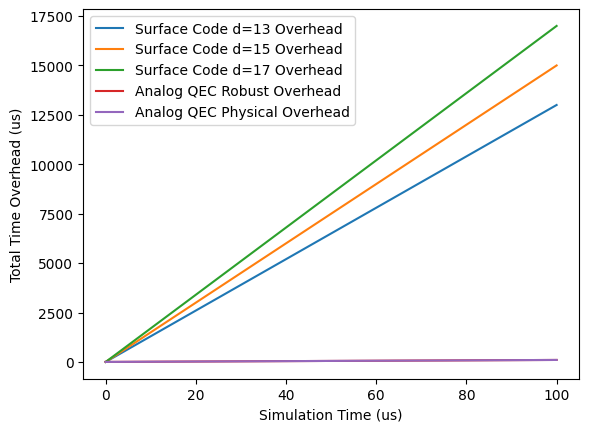

In [208]:
plt.plot(sim_T_list, T_log13_list, label='Surface Code d=13 Overhead')
plt.plot(sim_T_list, T_log15_list, label='Surface Code d=15 Overhead')
plt.plot(sim_T_list, T_log17_list, label='Surface Code d=17 Overhead')
plt.plot(sim_T_list, T_robust_list, label='Analog QEC Robust Overhead')
plt.plot(sim_T_list, T_phys_list, label='Analog QEC Physical Overhead')
plt.xlabel('Simulation Time (us)')
plt.ylabel('Total Time Overhead (us)')
plt.legend()
plt.show()

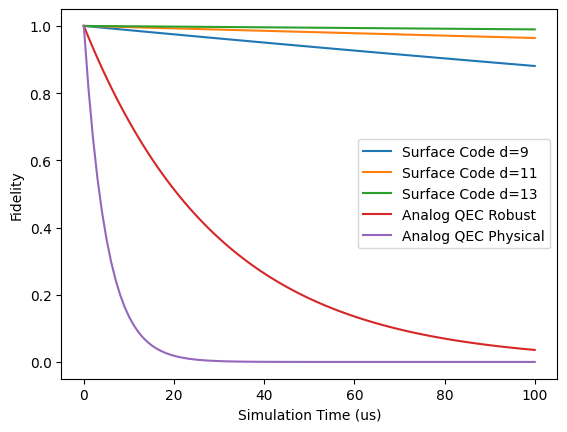

In [209]:
plt.plot(sim_T_list, fidelity_log13_list, label='Surface Code d=9')
plt.plot(sim_T_list, fidelity_log15_list, label='Surface Code d=11')
plt.plot(sim_T_list, fidelity_log17_list, label='Surface Code d=13')
plt.plot(sim_T_list, fidelity_robust_list, label='Analog QEC Robust')
plt.plot(sim_T_list, fidelity_phys_list, label='Analog QEC Physical')
plt.xlabel('Simulation Time (us)')
plt.ylabel('Fidelity')
plt.legend()
plt.show()


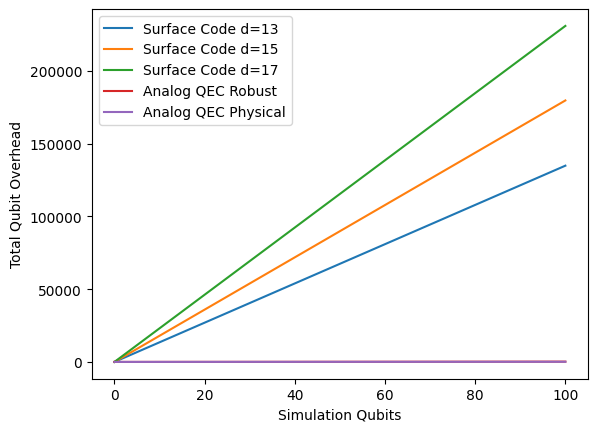

In [210]:
plt.plot(sim_n_list, n_log13_list, label='Surface Code d=13')
plt.plot(sim_n_list, n_log15_list, label='Surface Code d=15')
plt.plot(sim_n_list, n_log17_list, label='Surface Code d=17')
plt.plot(sim_n_list, n_robust_list, label='Analog QEC Robust')
plt.plot(sim_n_list, n_phys_list, label='Analog QEC Physical')
plt.xlabel('Simulation Qubits')
plt.ylabel('Total Qubit Overhead')
plt.legend()
plt.show()

# Joint plot

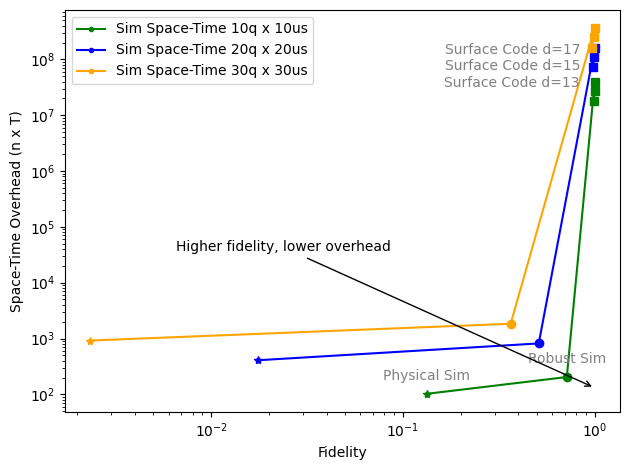

In [227]:
sim_T_indices = [10, 20, 30]
sim_n_indices = [10, 20, 30]

colors = ['green','blue', 'orange']
for i, (sim_n_index, sim_T_index) in enumerate(zip(sim_n_indices,sim_T_indices)):
    nT_log13 = n_log13_list[sim_n_index] * T_log13_list[sim_T_index]
    nT_log15 = n_log15_list[sim_n_index] * T_log15_list[sim_T_index]
    nT_log17 = n_log17_list[sim_n_index] * T_log17_list[sim_T_index]
    nT_robust = n_robust_list[sim_n_index] * T_robust_list[sim_T_index]
    nT_phys = n_phys_list[sim_n_index] * T_phys_list[sim_T_index]

    fidelity_log13 = fidelity_log13_list[sim_T_index]
    fidelity_log15 = fidelity_log15_list[sim_T_index]
    fidelity_log17 = fidelity_log17_list[sim_T_index]
    fidelity_robust = fidelity_robust_list[sim_T_index]
    fidelity_phys = fidelity_phys_list[sim_T_index]

    fidelities = [fidelity_log13, fidelity_log15, fidelity_log17, fidelity_robust, fidelity_phys]
    nTs = [nT_log13, nT_log15, nT_log17, nT_robust, nT_phys]


    plt.plot([fidelity_log13], [nT_log13], 's', color=colors[i])
    plt.plot([fidelity_log15], [nT_log15], 's', color=colors[i])
    plt.plot([fidelity_log17], [nT_log17], 's', color=colors[i])
    plt.plot([fidelity_robust], [nT_robust], 'o', color=colors[i])
    plt.plot([fidelity_phys], [nT_phys], '*', color=colors[i])
    # Add labels directly to the grey markers (only for the first sim point to avoid duplicates)
    if i == 0:
        plt.annotate('Surface Code d=13', (fidelity_log13, nT_log13), textcoords="offset points", xytext=(-10,10), ha='right', color='grey')
        plt.annotate('Surface Code d=15', (fidelity_log15, nT_log15), textcoords="offset points", xytext=(-10,15), ha='right', color='grey')
        plt.annotate('Surface Code d=17', (fidelity_log17, nT_log17), textcoords="offset points", xytext=(-10,20), ha='right', color='grey')
        plt.annotate('Robust Sim', (fidelity_robust, nT_robust), textcoords="offset points", xytext=(0,10), ha='center', color='grey')
        plt.annotate('Physical Sim', (fidelity_phys, nT_phys), textcoords="offset points", xytext=(0,10), ha='center', color='grey')


    plt.plot(fidelities, nTs, '.-', color=colors[i], label=f'Sim Space-Time {sim_n_list[sim_n_index]:.0f}q x {sim_T_list[sim_T_index]:.0f}us')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fidelity')
plt.ylabel('Space-Time Overhead (n x T)')
plt.annotate(
    'Higher fidelity, lower overhead',
    xy=(max(fidelities), min(nTs)/7),
    xytext=(0.2, 0.4),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='->', color='black')
)
plt.legend()
plt.tight_layout()